Многоклассовая классификация

загрузите из sklearn датасет с цифрами (каждый элемент кодирует изображение цифры размером 8х8)
подсказка from sklearn.datasets import load_digits
Осмотрите данные и метки.
попробуйте отобразить любое единичное изображение из набора с помощью matplotlib.
Примените тетрадку с прошлого урока к загруженному датасету в части многоклассовой классификации.
Рассмотрите матрицу неточностей, сделайте выводы какие цифры классификатор принимает за другие наиболее часто.
Сравните качество стратегий OvR и OvO.






In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math

In [5]:
digits = load_digits()

In [28]:
X = digits['data']
Y = digits['target']
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [17]:
feature_names = digits['feature_names']
target_names = digits['target_names']

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [6]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [21]:
Смотрим как выглядит матрица последней цифры в
images = digits['images']
images[-1]

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

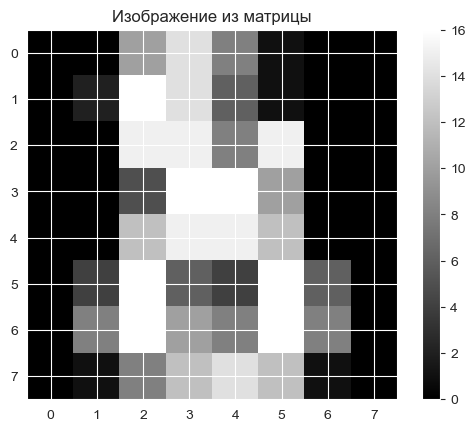

In [23]:
# создаем график
fig, ax = plt.subplots()

# создаем изображение из матрицы, используя метод imshow()
img = ax.imshow(images[-1], cmap='gray')

# добавляем цветовую шкалу
cbar = ax.figure.colorbar(img, ax=ax)

# добавляем заголовок
ax.set_title('Изображение из матрицы')

# показываем график
plt.show()

In [26]:
#Импортируем модель
from sklearn.linear_model import SGDClassifier
SGDclf = SGDClassifier (random_state = 42)

In [29]:
#обучаем модель
SGDclf.fit(X,Y)

SGDClassifier(random_state=42)

In [30]:
#предсказываем используя обученную модель
pred = SGDclf.predict(X)

In [34]:
# находим матрицу неточностей
cm = confusion_matrix(Y, pred)
cm

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 164,   1,   1,   0,   0,   0,   0,  14,   2],
       [  0,   0, 176,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 166,   0,   5,   0,   1,   8,   3],
       [  0,   1,   0,   0, 174,   1,   1,   1,   1,   2],
       [  0,   0,   0,   0,   0, 180,   0,   0,   1,   1],
       [  0,   0,   0,   0,   0,   0, 180,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 175,   1,   3],
       [  0,   1,   0,   0,   0,   0,   0,   0, 173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3, 177]])

<AxesSubplot:>

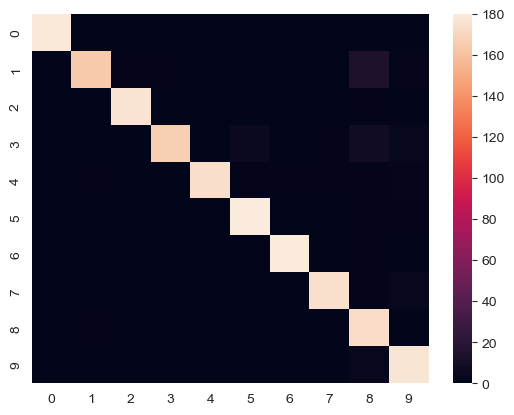

In [35]:
# посмотрим на  матрицу неточностей, видно что чифра 8 хуже всего распознаётся
sns.heatmap(cm)

In [33]:
# макро - считает метрики для каждой метки и берет среднее значение.
precision_score(Y,pred, average = 'macro'), recall_score(Y,pred, average = 'macro'), f1_score(Y,pred, average = 'macro')

(0.9720937814810465, 0.9702604940886219, 0.9701342616961084)

In [36]:
#стратегия OvR
from sklearn.multiclass import OneVsRestClassifier

ovrSGD = OneVsRestClassifier(SGDClassifier(random_state = 42))
ovrSGD.fit(X,Y)

OneVsRestClassifier(estimator=SGDClassifier(random_state=42))

In [39]:
# проверяем вторую в данных цифру
ovrSGD.decision_function([X[1]])

array([[-4949.04666793,   938.26919236, -3147.54980621, -1282.85689808,
         -941.32685122, -2799.74219275, -3509.08128318, -2057.35711913,
         -525.21269436, -1511.91846475]])

In [40]:
#стратегия OvО
from sklearn.multiclass import OneVsOneClassifier

ovoSGD = OneVsOneClassifier(SGDClassifier(random_state = 42))
ovoSGD.fit(X,Y)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [41]:
# проверяем вторую в данных цифру
ovoSGD.decision_function([X[1]])

array([[-0.33332741,  9.33332928,  3.66669877,  4.66676018,  7.33328495,
         0.66668048,  2.66668778,  3.66669217,  8.33332615,  3.66669356]])

Cтратегия OvR более уверенно предсказывает

Логистическая регрессия

Возьмите датасет с данными по телефонной компании с прошлых уроков.
Подготовьте данные для обучения.
Нормализуйте данные с помощью MinMaxScaler (рассматривали в конце прошлого урока)
Обучите логистическую регрессию на нормированных данных.
Посчитайте метрики на тестовом и обучающем множествах.

In [ ]:
from sklearn.linear_model import SGDRegressor